<a href="https://colab.research.google.com/github/Jhonier29/ClasificadorRopa/blob/main/Copia_de_final_proyecto_trabajo_grado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cargar Librerias

In [ ]:
! pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=ae6b3321955222374f6791084005a4f551224a968d22c72304195ceeb3192279
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import eli5
from eli5.sklearn import PermutationImportance
from keras.layers import LSTM, Dense
from tqdm.notebook import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

##Cargar Datos


In [ ]:
dataframe= pd.DataFrame()
backup_dataframe = dataframe
personas = ['pklS2_BD3','pklS3_BD3','pklS4_BD3','pklS5_BD3','pklS6_BD3','pklS7_BD3','pklS8_BD3','pklS9_BD3','pklS10_BD3','pklS11_BD3','pklS13_BD3','pklS14_BD3'] # Nombres de las bases de datos a usar
for i in personas:
  filename = '{0}.csv'.format(i)
  datos = pd.read_csv(filename,header=None)
  datos = datos.transpose()
  dataframe = pd.concat([dataframe, datos], axis=0)
dataframe= dataframe.reset_index(drop=True)
# Usar para BD1:
#nombres = ['Area' ,'COHE', 'distPKM', 'HF', 'HR' ,'LF', 'LFHF', 'pNN50', 'Ratiopoinc', 'RMSSD', 'SD1' ,'SD2', 'SDNN', 'TPower','VLF','target','target3']
# Usar para BD2:
#nombres = ['Area' ,'COHE', 'distPKM', 'HF', 'HR' ,'LF', 'LFHF', 'pNN50', 'Ratiopoinc', 'RMSSD', 'SD1' ,'SD2', 'SDNN', 'TPower','VLF','GSRm','SDNNG','maxG','minG','rangoGSR','penGSR','target','target3']
# Usar para BD3:
nombres = ['Area' ,'COHE', 'distPKM', 'HF', 'HR' ,'LF', 'LFHF', 'pNN50', 'Ratiopoinc', 'RMSSD', 'SD1' ,'SD2', 'SDNN', 'TPower','VLF','GSRm','SDNNG','maxG','minG','rangoGSR','penGSR','tempm','SDNNt','maxt','mint','RangoT','penT','target','target3']
# Usar para BD4:
#nombres = ['Area' ,'COHE', 'distPKM', 'HF', 'HR' ,'LF', 'LFHF', 'pNN50', 'Ratiopoinc', 'RMSSD', 'SD1' ,'SD2', 'SDNN', 'TPower','VLF','GSRm','SDNNG','maxG','minG','rangoGSR','penGSR','tempm','SDNNt','maxt','mint','RangoT','penT', 'EMGm', 'SDNNEMG', 'RangoEMG', 'integralEMG', 'medianaEMG', 'P10', 'P90', 'XYZ1m', 'XYZ2m', 'XYZ3m', 'SDNNXYZ1', 'SDNNXYZ2' ,'SDNNXYZ3', 'integralXYZ1', 'integralXYZ2','integralXYZ3', 'pinm', 'poutm', 'SDNNin', 'SDNNout','ratioIE','rangores', 'BR','target','target3']

feature_names=nombres[0:-2]
dataframe.columns= nombres
dataframe.head()

,Area,COHE,distPKM,HF,HR,LF,LFHF,pNN50,Ratiopoinc,RMSSD,...,rangoGSR,penGSR,tempm,SDNNt,maxt,mint,RangoT,penT,target,target3
0,39324.546063,0.855414,532.934211,29.057140,78.808977,28.676647,0.986905,31.0,0.938737,217.536110,...,2.860170,0.000033,29.155706,0.122127,30.475991,15.890026,14.585965,0.000312,0.0,0.0
1,38672.435897,0.846923,534.448718,27.775012,78.585650,27.637742,0.995058,32.0,0.930652,214.831833,...,1.063590,-0.000025,29.154188,0.073310,29.294478,28.973878,0.320600,-0.000004,0.0,0.0
2,38741.941830,0.830373,534.897436,27.587070,78.519726,27.490034,0.996483,33.0,0.930590,215.018290,...,1.022328,-0.000024,29.151599,0.076585,29.294478,28.967917,0.326561,-0.000004,0.0,0.0
3,39124.101591,0.803131,535.794872,27.757833,78.388208,27.477338,0.989895,33.0,0.921435,215.018290,...,0.948092,-0.000023,29.148821,0.079863,29.294478,28.962246,0.332232,-0.000004,0.0,0.0
4,40020.776239,0.802001,536.896104,28.589499,78.227426,28.566069,0.999180,33.0,0.912622,216.410518,...,0.924813,-0.000022,29.145801,0.083115,29.294478,28.955737,0.338741,-0.000004,0.0,0.0


##Normalizar datos 

In [ ]:
for names in nombres[0:-1]:
    val = dataframe[str(names)]    
    dataframe[str(names)]= (val-val.min())/(val.max()-val.min())

###Datos normalizados

In [ ]:
personas_test = ['pklS15_BD3','pklS16_BD3','pklS17_BD3']  #Sujeto con el cual se validara los algoritmos
testeo = pd.DataFrame()
for i in personas_test:
  filename = '{0}.csv'.format(i)
  pTest = pd.read_csv(filename,header=None)
  pTest = pTest.transpose()
  testeo = pd.concat([testeo, pTest], axis=0)
testeo= testeo.reset_index(drop=True)
testeo.columns= nombres
for names in nombres[0:-1]:
    val = testeo[str(names)]
    testeo[str(names)]= (val-val.min())/(val.max()-val.min())

##Datos de entrenamiento


In [ ]:
X=dataframe[feature_names]  # Caracteristicas
y=dataframe['target3']  # Etiqueta para clasifciacion de 3 clases

# Division de los datos para entrenamiento y prueba de manera automatica
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% Entrenamiento y 20% prueba
# Conjunto de datos para validar los algoritmos con el sujeto extraido
X_out= testeo[feature_names]
y_out = testeo['target3']

X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)


# Numero de divisiones de datos para validación cruzada

In [ ]:
kfold_validacion = KFold(5)

#Algoritmos de ML

## Random Forest

In [ ]:
#Hiperparámetros
n_estimators=120
max_depth=8
#Creación del modelo
RF = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
#Entrenamiento
RF.fit(X_train,y_train)
#Predicción
y_pred=RF.predict(X_test)

In [ ]:
# Metricas de analisis
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.955978415222948
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      4560
         1.0       0.99      0.97      0.98      1577
         2.0       1.00      0.72      0.83       905

    accuracy                           0.96      7042
   macro avg       0.98      0.90      0.93      7042
weighted avg       0.96      0.96      0.95      7042



###Caracteristicas mas importantes en RF

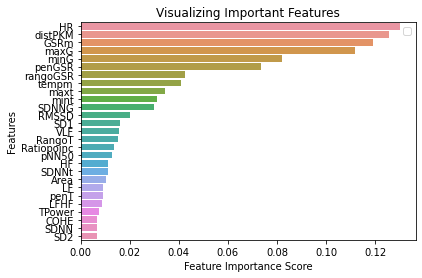

In [ ]:
feature_imp = pd.Series(RF.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp
imp1= feature_imp
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# Reporte de datos RF
report = classification_report(y_test, y_pred, output_dict=True)
resultadosRF = pd.DataFrame(report).transpose()
resultadosRF['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,y_pred)
resultadosRF['clasificador']= 'RF'
resultados = cross_val_score(RF, X, y, cv = kfold_validacion)
resultadosRF['Cross Validation']=resultados.mean()
car_imp=feature_imp[0:len(resultadosRF.axes[0])]
resultadosRF['CAR.IMP']= car_imp.index
resultadosRF['n_extimator| maxdepth']= (str(n_estimators) +' | '+ str(max_depth)) 
resultadosRF

,precision,recall,f1-score,support,balanced_accuracy,clasificador,Cross Validation,CAR.IMP,n_extimator| maxdepth
0.0,0.938763,0.998465,0.967694,4560.000000,0.895106,RF,0.701489,HR,120 | 8
1.0,0.991580,0.970831,0.981096,1577.000000,0.895106,RF,0.701489,distPKM,120 | 8
2.0,1.000000,0.716022,0.834514,905.000000,0.895106,RF,0.701489,GSRm,120 | 8
accuracy,0.955978,0.955978,0.955978,0.955978,0.895106,RF,0.701489,maxG,120 | 8
macro avg,0.976781,0.895106,0.927768,7042.000000,0.895106,RF,0.701489,minG,120 | 8
weighted avg,0.958461,0.955978,0.953580,7042.000000,0.895106,RF,0.701489,penGSR,120 | 8


###Matriz de confusión

[[5310   19    1]
 [  26 1812    0]
 [ 162    8  887]]


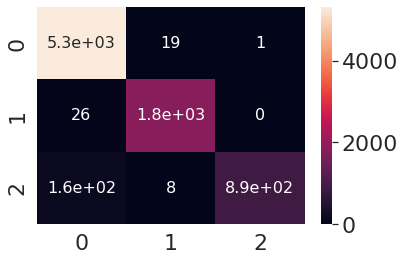

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
sns.set(font_scale=2)
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16})
plt.show()

##SVM

In [ ]:
# Hiperparámetros SVM rbf
gamma= 0.5
C1 = 10
# Hiperparámetros SVM polinomial
degree=3
C2 = 10
# Hiperparámetros SVM lineal
C3 = 10
rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C1).fit(X_train.values, y_train)
poly_svc = svm.SVC(kernel='poly', degree=degree, C=C2).fit(X_train.values, y_train)
lin_svc = svm.LinearSVC(C=C3, max_iter=10000).fit(X_train.values, y_train)

In [ ]:
# Resultados del modelo SVM rbf
Z = rbf_svc.predict(np.c_[X_test])
conf_mat = confusion_matrix(y_test, Z)
print(conf_mat)
report = classification_report(y_test, Z, output_dict=True)
rbf = pd.DataFrame(report).transpose()
rbf['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,Z)
resultados = cross_val_score(rbf_svc, X, y, cv = kfold_validacion)
rbf['Cross Validation'] = resultados.mean()

In [ ]:
# Resultados del modelo SVM polinomial
Z = poly_svc.predict(np.c_[X_test])
conf_mat = confusion_matrix(y_test, Z)
print(conf_mat)
report = classification_report(y_test, Z, output_dict=True)
poly = pd.DataFrame(report).transpose()
poly['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,Z)
resultados = cross_val_score(poly_svc, X, y, cv = kfold_validacion)
poly['Cross Validation'] = resultados.mean()


[[4494   26   40]
 [  37 1538    2]
 [ 500    2  403]]


In [ ]:
# Resultados del modelo SVM lineal
Z = lin_svc.predict(np.c_[X_test])
conf_mat = confusion_matrix(y_test, Z)
print(conf_mat)
report = classification_report(y_test, Z, output_dict=True)
lin = pd.DataFrame(report).transpose()
lin['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,Z)
resultados = cross_val_score(lin_svc, X, y, cv = kfold_validacion)
lin['Cross Validation'] = resultados.mean()

[[4435  114   11]
 [ 285 1291    1]
 [ 874   19   12]]


In [ ]:
rbf['C | gamma']=str(C1)+' | '+str(gamma)
poly['C | degree']= str(C2)+' | '+str(degree)
lin['C']= str(C3)

###Caracteristicas mas importantes de SVM

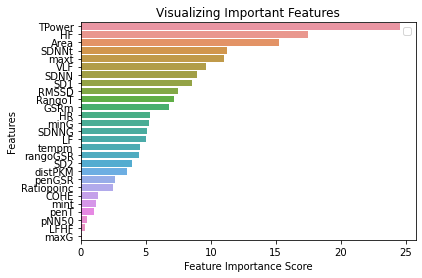

In [ ]:
features_svmL=pd.Series(abs(lin_svc.coef_[0]), index=feature_names).sort_values(ascending=False)
imp2=features_svmL
%matplotlib inline
car_imp=features_svmL[0:6]
lin['CAR.IMP']= car_imp.index
# Creating a bar plot
sns.barplot(x=features_svmL, y=features_svmL.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Text(0.5, 0, 'Permutation Importance')

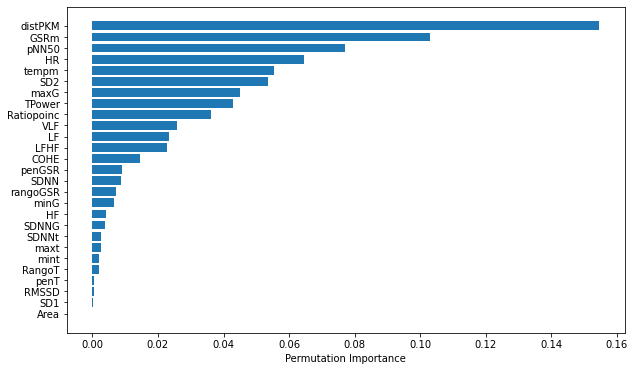

In [ ]:
perm_importance = permutation_importance(rbf_svc, X_test.values, y_test.values)
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
imp3=features[sorted_idx]
imp3=imp3[::-1]
plt.figure(figsize=(10,6))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
rbf['CAR.IMP']= features[sorted_idx][::-1][0:6]
rbf['CAR.IMP']

0.0             distPKM
1.0                GSRm
2.0               pNN50
accuracy             HR
macro avg         tempm
weighted avg        SD2
Name: CAR.IMP, dtype: object

Text(0.5, 0, 'Permutation Importance')

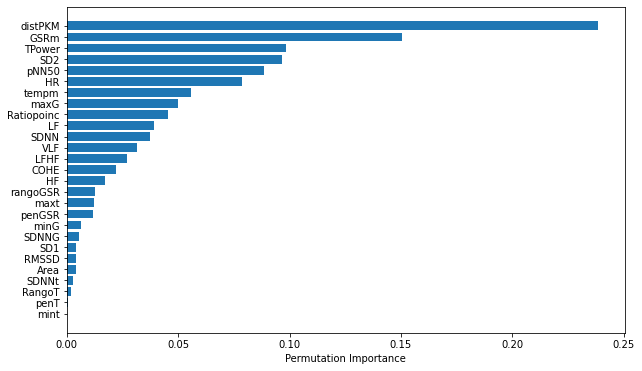

In [ ]:
perm_importance = permutation_importance(poly_svc, X_test.values, y_test.values)
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
imp4=features[sorted_idx]
imp4=imp4[::-1]
plt.figure(figsize=(10,6))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
poly['CAR.IMP']= features[sorted_idx][::-1][0:6]
poly['CAR.IMP']

0.0             distPKM
1.0                GSRm
2.0              TPower
accuracy            SD2
macro avg         pNN50
weighted avg         HR
Name: CAR.IMP, dtype: object

In [ ]:
resultadosSVM = pd.concat([rbf,poly,lin], axis=0)
resultadosSVM['clasificador']= ['rbf','rbf','rbf','rbf','rbf','rbf','poly','poly','poly','poly','poly','poly','linear','linear','linear','linear','linear','linear'] 
resultadosSVM

,precision,recall,f1-score,support,balanced_accuracy,Cross Validation,C | gamma,CAR.IMP,C | degree,C,clasificador
0.0,0.891464,0.988145,0.937318,4555.000000,0.786723,0.735140,10 | 0.5,distPKM,NaN,NaN,rbf
1.0,0.981401,0.972956,0.977160,1627.000000,0.786723,0.735140,10 | 0.5,GSRm,NaN,NaN,rbf
2.0,0.907162,0.399067,0.554295,857.000000,0.786723,0.735140,10 | 0.5,pNN50,NaN,NaN,rbf
accuracy,0.912914,0.912914,0.912914,0.912914,0.786723,0.735140,10 | 0.5,HR,NaN,NaN,rbf
macro avg,0.926676,0.786723,0.822924,7039.000000,0.786723,0.735140,10 | 0.5,tempm,NaN,NaN,rbf
weighted avg,0.914163,0.912914,0.899894,7039.000000,0.786723,0.735140,10 | 0.5,SD2,NaN,NaN,rbf
0.0,0.893262,0.985526,0.937129,4560.000000,0.802033,0.722364,NaN,distPKM,10 | 3,NaN,poly
1.0,0.982120,0.975269,0.978683,1577.000000,0.802033,0.722364,NaN,GSRm,10 | 3,NaN,poly
2.0,0.905618,0.445304,0.597037,905.000000,0.802033,0.722364,NaN,TPower,10 | 3,NaN,poly
accuracy,0.913803,0.913803,0.913803,0.913803,0.802033,0.722364,NaN,SD2,10 | 3,NaN,poly


##Red Neuronal


###3 clases

In [ ]:
# Clasificación multiclase
epochsRN =50
neurons = 0 #Neuronas de la capa oculta
# definición del modelo
def baseline_model(neurons):
  # Creación el modelo
  model = Sequential()
  model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
  #model.add(Dense(neurons, activation='relu')) #capa oculta(descomentar si se requiere)
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
estimator = KerasClassifier(build_fn=baseline_model, neurons = neurons,epochs= epochsRN, verbose=0)
seed = 5
np.random.seed(seed)
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-70-cb4477a21ad5>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=baseline_model, neurons = neurons,epochs= epochsRN, verbose=0)


Accuracy: 90.31% (0.51%)


In [ ]:
#Entrenamiento de la red
estimator.fit(X_train, y_train)

In [ ]:
# Caracteristicas importantes
perm = PermutationImportance(estimator, random_state=1).fit(X_train, y_train)
impFNN=np.argsort(perm.feature_importances_)
features = np.array(feature_names)
imp5=features[impFNN][::-1]

In [ ]:
# Resultados RN
y_pred = estimator.predict(X_test)
report = classification_report(y_test,y_pred, output_dict=True)
resultadosRN = pd.DataFrame()
resultadosRN = pd.DataFrame(report).transpose()
resultadosRN['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,y_pred)
resultadosRN['CAR.IMP']= features[impFNN][::-1][0:6]
resultadosRN['epocas'] = str(epochsRN)
resultadosRN['clasificador'] = 'RN'
resultadosRN['Cross Validation'] = results.mean()
resultadosRN

221/221 [==============================] - 0s 1ms/step


,precision,recall,f1-score,support,balanced_accuracy,CAR.IMP,epocas,clasificador,Cross Validation
0.0,0.919032,0.965789,0.941831,4560.000000,0.842443,distPKM,50,RN,0.90311
1.0,0.960075,0.975904,0.967925,1577.000000,0.842443,GSRm,50,RN,0.90311
2.0,0.819165,0.585635,0.682990,905.000000,0.842443,HR,50,RN,0.90311
accuracy,0.919199,0.919199,0.919199,0.919199,0.842443,maxG,50,RN,0.90311
macro avg,0.899424,0.842443,0.864248,7042.000000,0.842443,pNN50,50,RN,0.90311
weighted avg,0.915389,0.919199,0.914409,7042.000000,0.842443,Ratiopoinc,50,RN,0.90311


#Red Neuronal LSTM

In [ ]:
# Añadir una tercera dimensión a los conjuntos de datos
nmp=X_train.to_numpy()
Xa = np.reshape(nmp, (len(nmp),1,len(feature_names)))
XTa = np.reshape(X_test.values, (len(X_test),1,len(feature_names)))

###3 clases

In [ ]:
# Clasificación multiclase
epochsLSTM =15
# Definición del modelos
def LSTM_model():
  # Creación el modelo
  modelo = Sequential()
  modelo.add(LSTM(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
  modelo.add(Dense(3, activation='softmax'))
  modelo.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
  return modelo
estimatorLSTM = KerasClassifier(build_fn=LSTM_model,epochs= epochsLSTM, verbose=0)
seed = 5
np.random.seed(seed)
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
resultsLSTM = cross_val_score(estimatorLSTM, Xa, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (resultsLSTM .mean()*100, resultsLSTM .std()*100))

<ipython-input-79-f31c1d438384>:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimatorLSTM = KerasClassifier(build_fn=LSTM_model,epochs= epochsLSTM, verbose=0)


Accuracy: 43.09% (16.90%)


In [ ]:
# Entrenamiento de la red LSTM
estimatorLSTM.fit(Xa, y_train)

In [ ]:
# Caracterisitcas importantes
CILSTM = []
predLSTM= estimatorLSTM.predict(XTa,verbose=0).squeeze()
baseline_mae = np.mean(np.abs(predLSTM-y_test))         
COLS = list(X_train.columns)
for k in tqdm(range(len(COLS))):
                
  save_col = XTa[:,:,k].copy()
  np.random.shuffle(XTa[:,:,k])
          
  oof_preds = estimatorLSTM.predict(XTa, verbose=0).squeeze() 
  mae = np.mean(np.abs( oof_preds-y_test ))
  CILSTM.append({'feature':COLS[k],'mae':mae})
  XTa[:,:,k] = save_col

  0%|          | 0/27 [00:00<?, ?it/s]

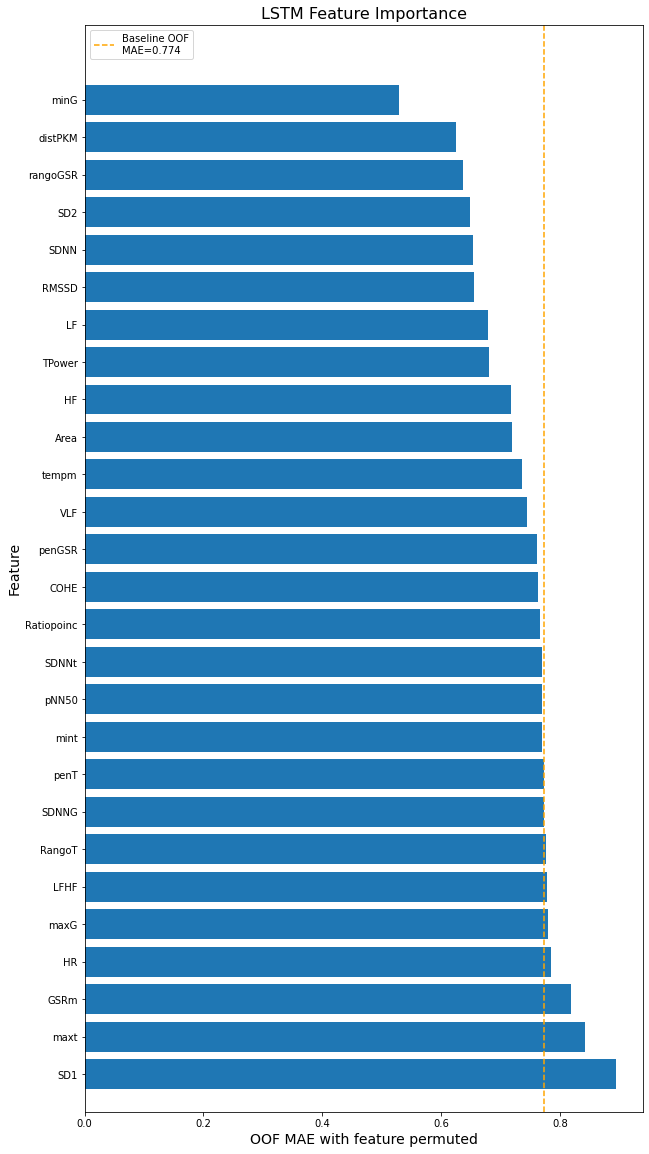

In [ ]:
print()
df = pd.DataFrame(CILSTM)
df = df.sort_values('mae',ascending=False)
imp6=np.array(df['feature'][0::])
plt.figure(figsize=(10,20))
plt.barh(np.arange(len(COLS)),df.mae)
plt.yticks(np.arange(len(COLS)),df.feature.values)
plt.title('LSTM Feature Importance',size=16)
plt.ylim((-1,len(COLS)+1))
plt.plot([baseline_mae,baseline_mae],[-1,len(COLS)+1], '--', color='orange',
          label=f'Baseline OOF\nMAE={baseline_mae:.3f}')
plt.xlabel(f'OOF MAE with feature permuted',size=14)
plt.ylabel('Feature',size=14)
plt.legend()
plt.show()

In [ ]:
#Resultados de red LSTM
predLSTM= estimatorLSTM.predict(XTa)
report = classification_report(y_test,predLSTM, output_dict=True)
resultadosRNLSTM = pd.DataFrame()
RNLSTM = pd.DataFrame(report).transpose()
RNLSTM['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,predLSTM)
resultadosRNLSTM = resultadosRNLSTM.append(RNLSTM)
resultadosRNLSTM['CAR.IMP']= np.array(df['feature'][0:6])
resultadosRNLSTM['epocas'] =str(epochsLSTM)
resultadosRNLSTM['Cross Validation'] = resultsLSTM.mean()
resultadosRNLSTM['clasificador'] = 'LSTM'
resultadosRNLSTM

221/221 [==============================] - 1s 2ms/step


,precision,recall,f1-score,support,balanced_accuracy,CAR.IMP,epocas,Cross Validation,clasificador
0.0,0.586118,0.050000,0.092140,4560.000000,0.322829,SD1,15,0.430938,LSTM
1.0,0.218309,0.911858,0.352278,1577.000000,0.322829,maxt,15,0.430938,LSTM
2.0,0.090909,0.006630,0.012358,905.000000,0.322829,GSRm,15,0.430938,LSTM
accuracy,0.237433,0.237433,0.237433,0.237433,0.322829,HR,15,0.430938,LSTM
macro avg,0.298445,0.322829,0.152259,7042.000000,0.322829,maxG,15,0.430938,LSTM
weighted avg,0.440109,0.237433,0.140143,7042.000000,0.322829,LFHF,15,0.430938,LSTM


ADABOOST

In [ ]:
ydf = pd.DataFrame(y_train)
ytestdf = pd.DataFrame(y_test)
# Hiperparámetros
n_estimator= 50
learning_rate= 0.1

AB = AdaBoostClassifier(n_estimators=n_estimator, learning_rate= learning_rate)
AB.fit(X_train, y_train)
y_predAB=AB.predict(X_test)

if max(y_test)==2:
  xad = X_train.drop(ydf[ydf['target3']==0].index)
  yad =y_train.drop(ydf[ydf['target3']==0].index) 
  AB2 = AdaBoostClassifier(n_estimators=n_estimator, learning_rate= learning_rate)
  AB2.fit(xad, yad)

  for i in range(0,len(y_predAB),1):
    if y_predAB[i]==1:
      y_predAB[i] = AB2.predict(X_test.loc[[i]])

print(classification_report(y_test, y_predAB))

              precision    recall  f1-score   support

         0.0       0.76      0.99      0.86      4560
         1.0       0.94      0.67      0.78      1577
         2.0       0.43      0.01      0.01       905

    accuracy                           0.79      7042
   macro avg       0.71      0.55      0.55      7042
weighted avg       0.76      0.79      0.73      7042



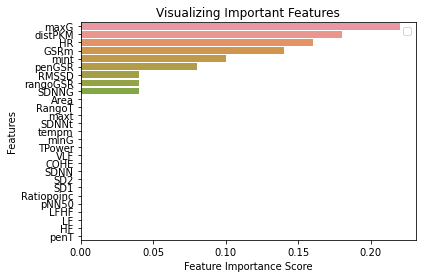

In [ ]:
# Caracteristicas importantes
feature_impAB = pd.Series(AB.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_impAB
imp7=feature_impAB
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_impAB, y=feature_impAB.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# Resultados AB
report = classification_report(y_test,y_predAB, output_dict=True)
resultadosAB = pd.DataFrame()
rAB = pd.DataFrame(report).transpose()
resultadosAB = resultadosAB.append(rAB)
resultadosAB['balanced_accuracy'] = metrics.balanced_accuracy_score(y_test,y_predAB)
resultadosAB['n_est | learning rate']= str(n_estimator)+' | '+str(learning_rate)
resultadosAB['clasificador']='AB'
resultados = cross_val_score(AB, X, y, cv = kfold_validacion)
resultadosAB['Cross Validation'] = resultados.mean()
car_imp=feature_impAB[0:len(resultadosAB.axes[0])]
resultadosAB['CAR.IMP']= car_imp.index
resultadosAB

,precision,recall,f1-score,support,balanced_accuracy,n_est | learning rate,clasificador,Cross Validation,CAR.IMP
0.0,0.763332,0.988816,0.861565,4560.000000,0.554812,50 | 0.1,AB,0.77934,maxG
1.0,0.941124,0.668992,0.782061,1577.000000,0.554812,50 | 0.1,AB,0.77934,distPKM
2.0,0.428571,0.006630,0.013058,905.000000,0.554812,50 | 0.1,AB,0.77934,HR
accuracy,0.790968,0.790968,0.790968,0.790968,0.554812,50 | 0.1,AB,0.77934,GSRm
macro avg,0.711009,0.554812,0.552228,7042.000000,0.554812,50 | 0.1,AB,0.77934,mint
weighted avg,0.760125,0.790968,0.734715,7042.000000,0.554812,50 | 0.1,AB,0.77934,penGSR


### Concatenación de los resultados de los algoritmos con la división de datos 80% - 20%

In [ ]:
resul = pd.concat([resultadosRF, resultadosSVM, resultadosRN,resultadosRNLSTM, resultadosAB], axis=0)
resul.fillna('-')

,precision,recall,f1-score,support,balanced_accuracy,clasificador,Cross Validation,CAR.IMP,n_extimator| maxdepth,C | gamma,C | degree,C,epocas,n_est | learning rate
0.0,0.938763,0.998465,0.967694,4560.000000,0.895106,RF,0.701489,HR,120 | 8,-,-,-,-,-
1.0,0.991580,0.970831,0.981096,1577.000000,0.895106,RF,0.701489,distPKM,120 | 8,-,-,-,-,-
2.0,1.000000,0.716022,0.834514,905.000000,0.895106,RF,0.701489,GSRm,120 | 8,-,-,-,-,-
accuracy,0.955978,0.955978,0.955978,0.955978,0.895106,RF,0.701489,maxG,120 | 8,-,-,-,-,-
macro avg,0.976781,0.895106,0.927768,7042.000000,0.895106,RF,0.701489,minG,120 | 8,-,-,-,-,-
weighted avg,0.958461,0.955978,0.953580,7042.000000,0.895106,RF,0.701489,penGSR,120 | 8,-,-,-,-,-
0.0,0.891464,0.988145,0.937318,4555.000000,0.786723,rbf,0.735140,distPKM,-,10 | 0.5,-,-,-,-
1.0,0.981401,0.972956,0.977160,1627.000000,0.786723,rbf,0.735140,GSRm,-,10 | 0.5,-,-,-,-
2.0,0.907162,0.399067,0.554295,857.000000,0.786723,rbf,0.735140,pNN50,-,10 | 0.5,-,-,-,-
accuracy,0.912914,0.912914,0.912914,0.912914,0.786723,rbf,0.735140,HR,-,10 | 0.5,-,-,-,-


### Validación con el sujeto extraido

In [ ]:
#RF
y_pred=RF.predict(X_out)
report = classification_report(y_out, y_pred, output_dict=True)
resultadosRF2 = pd.DataFrame(report).transpose()
resultadosRF2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,y_pred)

#SVM rbf
Z = rbf_svc.predict(np.c_[X_out])
conf_mat = confusion_matrix(y_out, Z)
print(conf_mat)
report = classification_report(y_out, Z, output_dict=True)
rbf2 = pd.DataFrame(report).transpose()
rbf2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,Z)

#SVM polinomial
Z = poly_svc.predict(np.c_[X_out])
conf_mat = confusion_matrix(y_out, Z)
print(conf_mat)
report = classification_report(y_out, Z, output_dict=True)
poly2 = pd.DataFrame(report).transpose()
poly2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,Z)

#SVM lineal
Z = lin_svc.predict(np.c_[X_out])
conf_mat = confusion_matrix(y_out, Z)
print(conf_mat)
report = classification_report(y_out, Z, output_dict=True)
lin2 = pd.DataFrame(report).transpose()
lin2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,Z)

resultadosSVM2 = pd.concat([rbf2,poly2,lin2], axis=0)

#RN
y_pr= estimator.predict(X_out)
report = classification_report(y_out,y_pr, output_dict=True)
resultadosRN2 = pd.DataFrame()
RNeuronal2 = pd.DataFrame(report).transpose()
RNeuronal2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,y_pr)
resultadosRN2 = resultadosRN2.append(RNeuronal2)

#LSTM
XTa = np.reshape(X_out.values, (len(X_out),1,len(feature_names)))
predLSTM= estimatorLSTM.predict(XTa)
report = classification_report(y_out,predLSTM, output_dict=True)
resultadosRNLSTM2 = pd.DataFrame()
RNLSTM2 = pd.DataFrame(report).transpose()
RNLSTM2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,predLSTM)
resultadosRNLSTM2 = resultadosRNLSTM2.append(RNLSTM2)

#AB
y_predAB=AB.predict(X_out)

if max(y_out)==2:
  xad = X.drop(ydf[ydf['target3']==0].index)
  yad =y.drop(ydf[ydf['target3']==0].index) 
  AB2 = AdaBoostClassifier(n_estimators=n_estimator, learning_rate= learning_rate)
  AB2.fit(xad, yad)
 
  for i in range(0,len(y_predAB)-1,1):
    if y_predAB[i]==1:
       y_predAB[i] = AB2.predict(X_out.loc[[i]])
    
  
report = classification_report(y_out,y_predAB, output_dict=True)
resultadosAB2 = pd.DataFrame()
rAB = pd.DataFrame(report).transpose()
resultadosAB2 = resultadosAB2.append(rAB)
    #resultadosSVM = resultadosSVM()
resultadosAB2['balanced_accuracy*'] = metrics.balanced_accuracy_score(y_out,y_predAB)
resultadosAB2[''] = ''

# Concatenación de los resultados de los algoritmos al validar con el sujeto extraido
result = pd.concat([resultadosRF2, resultadosSVM2, resultadosRN2,resultadosRNLSTM2, resultadosAB2], axis=0)
result.fillna('-')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[5308   84  281]
 [ 131 1953    0]
 [ 367  168  578]]
[[5397   78  198]
 [ 123 1961    0]
 [ 487  120  506]]
[[2486  241 2946]
 [ 132 1373  579]
 [ 489    8  616]]
278/278 [==============================] - 1s 2ms/step


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support,balanced_accuracy*,
0.0,0.866459,0.979023,0.919308,5673.000000,0.651357,-
1.0,0.826016,0.975048,0.894366,2084.000000,0.651357,-
2.0,0.000000,0.000000,0.000000,1113.000000,0.651357,-
accuracy,0.855242,0.855242,0.855242,0.855242,0.651357,-
macro avg,0.564158,0.651357,0.604558,8870.000000,0.651357,-
weighted avg,0.748234,0.855242,0.798094,8870.000000,0.651357,-
0.0,0.914227,0.935660,0.924819,5673.000000,0.797372,-
1.0,0.885714,0.937140,0.910702,2084.000000,0.797372,-
2.0,0.672875,0.519317,0.586207,1113.000000,0.797372,-
accuracy,0.883766,0.883766,0.883766,0.883766,0.797372,-


In [ ]:
Final_res = pd.concat([resul,result], axis=1)
Final_res.fillna('-')
Final_res.to_excel('S151617_BD3_tri.xlsx')

## Procedimiento de extracción de resultados con las caracteristicas mas importantes extraidas

In [ ]:
numeroCarImp=40 #Numero de caracteristicas mas relevantes con las cuales se va a entrenar
dfimp1=pd.DataFrame(imp1[0:numeroCarImp]).reset_index().rename(columns={'index':'Carac'})
dfimp2=pd.DataFrame(imp2[0:numeroCarImp]).reset_index().rename(columns={'index':'Carac'})
dfimp3=pd.DataFrame(imp3[0:numeroCarImp],columns=['Carac'])
dfimp4=pd.DataFrame(imp4[0:numeroCarImp],columns=['Carac'])
dfimp5=pd.DataFrame(imp5[0:numeroCarImp],columns=['Carac'])
dfimp6=pd.DataFrame(imp6[0:numeroCarImp],columns=['Carac'])
dfimp7=pd.DataFrame(imp7[0:numeroCarImp]).reset_index().rename(columns={'index':'Carac'})

### Lista de caracteristica más relevantes en orden de importancia

In [ ]:
dfCarImp=pd.DataFrame(pd.concat([dfimp1['Carac'],dfimp2['Carac'],dfimp3['Carac'],dfimp4['Carac'],dfimp5['Carac'],dfimp6['Carac'],dfimp7['Carac']],axis=0))
resultadosCar = dfCarImp.value_counts().reset_index()
CaracCo=list(resultadosCar['Carac'][0:numeroCarImp])
CaracCo

In [ ]:
# Creación de los nuevos conjuntos de entrenamiento con las caracteristicas mas importantes
X_train2=X_train[CaracCo].copy()
X_out2=X_out[CaracCo].copy()

Entrenamiento y validación de los algoritmos

In [ ]:
#RF
RF = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
RF.fit(X_train2,y_train)
y_pred=RF.predict(X_out2)
report = classification_report(y_out, y_pred, output_dict=True)
resultadosRF3 = pd.DataFrame(report).transpose()
resultadosRF3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,y_pred)

#SVM 
rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C1).fit(X_train2.values, y_train)
poly_svc = svm.SVC(kernel='poly', degree=degree, C=C2).fit(X_train2.values, y_train)
lin_svc = svm.LinearSVC(C=C3, max_iter=10000).fit(X_train2.values, y_train)

#SVM rbf
Z = rbf_svc.predict(np.c_[X_out2])
conf_mat = confusion_matrix(y_out, Z)
print(conf_mat)
report = classification_report(y_out, Z, output_dict=True)
rbf3 = pd.DataFrame(report).transpose()
rbf3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,Z)

#SVM polinomial
Z = poly_svc.predict(np.c_[X_out2])
conf_mat = confusion_matrix(y_out, Z)
print(conf_mat)
report = classification_report(y_out, Z, output_dict=True)
poly3 = pd.DataFrame(report).transpose()
poly3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,Z)

#SVM lineal
Z = lin_svc.predict(np.c_[X_out2])
conf_mat = confusion_matrix(y_out, Z)
print(conf_mat)
report = classification_report(y_out, Z, output_dict=True)
lin3 = pd.DataFrame(report).transpose()
lin3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,Z)

resultadosSVM3 = pd.concat([rbf3,poly3,lin3], axis=0)

#RN
def baseline_model(neurons):
  # crea el modelo
  model = Sequential()
  model.add(Dense(X_train2.shape[1], input_dim=X_train2.shape[1], activation='relu'))
  #model.add(Dense(neurons, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  # Compile el modelo
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
estimator = KerasClassifier(build_fn=baseline_model, neurons = neurons,epochs= epochsRN, verbose=0)
estimator.fit(X_train2, y_train)
y_pr= estimator.predict(X_out2)
report = classification_report(y_out,y_pr, output_dict=True)
resultadosRN3 = pd.DataFrame()
RNeuronal3 = pd.DataFrame(report).transpose()
RNeuronal3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,y_pr)
resultadosRN3 = resultadosRN3.append(RNeuronal3)

#LSTM
nmp=X_train2.to_numpy()
Xa = np.reshape(nmp, (len(nmp),1,numeroCarImp))
XTa = np.reshape(X_out2.values, (len(X_out2),1,numeroCarImp))
def LSTM_model():
  # crea el modelo
  modelo = Sequential()
  modelo.add(LSTM(X_train2.shape[1], input_dim=X_train2.shape[1], activation='relu'))
  modelo.add(Dense(3, activation='softmax'))
  modelo.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
  # Compile el modelo
  return modelo
estimatorLSTM = KerasClassifier(build_fn=LSTM_model,epochs= epochsLSTM, verbose=0)
estimatorLSTM.fit(Xa, y_train)
predLSTM= estimatorLSTM.predict(XTa)
report = classification_report(y_out,predLSTM, output_dict=True)
resultadosRNLSTM3 = pd.DataFrame()
RNLSTM3 = pd.DataFrame(report).transpose()
RNLSTM3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,predLSTM)
resultadosRNLSTM3 = resultadosRNLSTM3.append(RNLSTM3)

#AB

AB = AdaBoostClassifier(n_estimators=n_estimator, learning_rate= learning_rate)
AB.fit(X_train2, y_train)

y_predAB=AB.predict(X_out2)

if max(y_out)==2:
  xad = X_train2.drop(ydf[ydf['target3']==0].index)
  yad =y_train.drop(ydf[ydf['target3']==0].index) 
  AB2 = AdaBoostClassifier(n_estimators=n_estimator, learning_rate= learning_rate)
  AB2.fit(xad, yad)

 
  for i in range(0,len(y_predAB)-1,1):
    if y_predAB[i]==1:
       y_predAB[i] = AB2.predict(X_out2.loc[[i]])
    
report = classification_report(y_out,y_predAB, output_dict=True)
resultadosAB3 = pd.DataFrame()
rAB = pd.DataFrame(report).transpose()
resultadosAB3 = resultadosAB3.append(rAB)
resultadosAB3['balanced_accuracy**'] = metrics.balanced_accuracy_score(y_out,y_predAB)

# Concatenación de los resultados de los algoritmos al validar con el sujeto extraido y caracteristicas reducidas
result2 = pd.concat([resultadosRF3, resultadosSVM3, resultadosRN3,resultadosRNLSTM3, resultadosAB3], axis=0)
result2.fillna('-')

##Unión de todos los resultados

In [ ]:
Final_res = pd.concat([resul,result,result2], axis=1)
Final_res.fillna('-')

# Guardar archivo de datos

In [ ]:
#Final_res.to_excel(str(personas_test)[5:-2]+'_C='+str(numeroCarImp)+'_tri.xlsx')